In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from scipy import stats
sns.set()

In [2]:
pd.options.display.width = 1000

In [3]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [4]:
parasweep

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1.157000e+03,1152.000000,5.0,0.005,5.000000,1,20
1,0.391062,1.139000e+03,563.000000,5.0,0.005,6.666667,1,20
2,0.371088,3.011000e+03,253.000000,5.0,0.005,8.333333,1,20
3,0.198700,5.800000e+02,80.000000,5.0,0.005,10.000000,1,20
4,0.437672,7.570000e+02,717.000000,5.0,0.005,11.666667,1,20
...,...,...,...,...,...,...,...,...
431995,2.411189,1.102857e+03,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,3.614286e+02,1532.571429,100.0,0.100,88.157895,7,40
431997,2.330160,6.644286e+02,805.428571,100.0,0.100,92.105263,7,40
431998,20.024446,1.067954e+07,53.285714,100.0,0.100,96.052632,7,40


In [5]:
# The records with population explosion are removed in the linearity analysis
para_under_20 = parasweep[parasweep["runtime"]<20]

Text(0.5, 0, 'runtime')

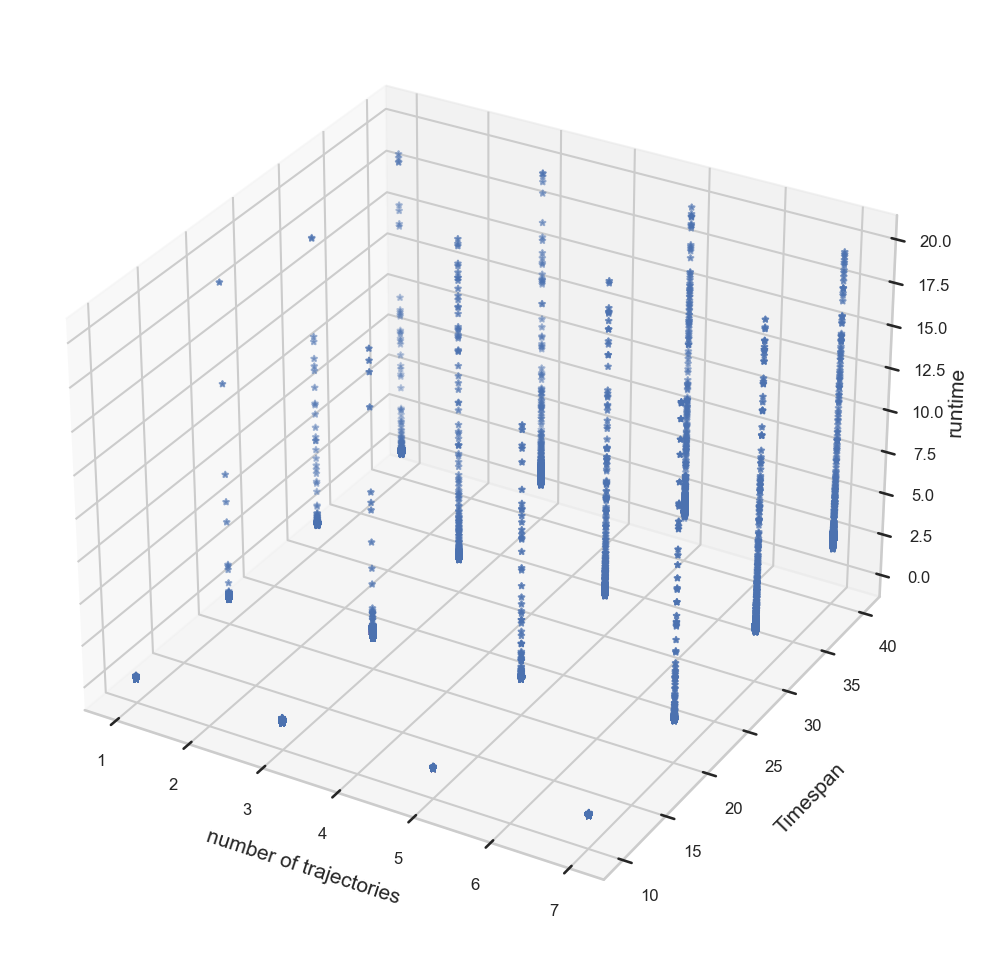

In [6]:
# The distribution of running times based on number of trajectories and Timespan.
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,8))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=para_under_20["number_of_trajectories"], ys=para_under_20["Timespan"], zs=para_under_20["runtime"],c="b",marker="*", s = 8)
plt.tick_params(labelsize=8)
ax.set_xlabel("number of trajectories",fontsize=10)
ax.set_ylabel("Timespan",labelpad=7,fontsize=10)
ax.set_zlabel("runtime",labelpad=-0.7,fontsize=10)
#plt.savefig("simupara3d.png",bbox_inches='tight')

In [7]:
para_under_20["Timespan"].unique()

array([20, 40, 10, 30], dtype=int64)

In [8]:
para_under_20["number_of_trajectories"].unique()

array([1, 3, 5, 7], dtype=int64)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7256\701184896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_under_20['Timespan*number_of_trajectories'] = para_under_20['Timespan'] * para_under_20['number_of_trajectories']


<AxesSubplot:xlabel='Timespan*number_of_trajectories', ylabel='runtime'>

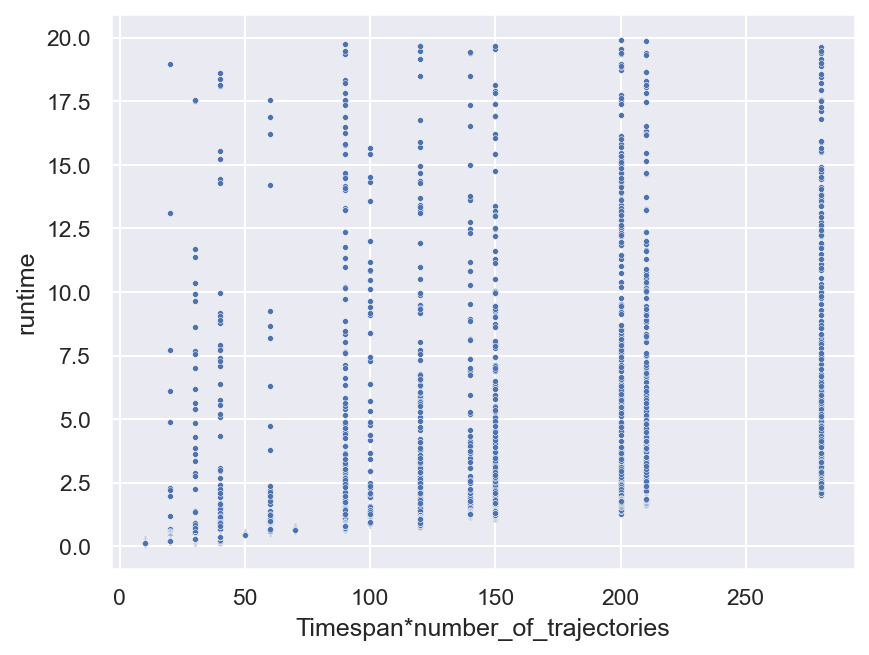

In [9]:
sns.set()
para_under_20['Timespan*number_of_trajectories'] = para_under_20['Timespan'] * para_under_20['number_of_trajectories']
sns.scatterplot(para_under_20, x='Timespan*number_of_trajectories', y='runtime',s = 8)

In [10]:
para_under_20_groups = para_under_20.groupby(['number_of_trajectories','Timespan'])
# Multiple list
lst = []
# Product list
lst_para = []

# Use this as the basis
base = para_under_20[para_under_20["Timespan"] == 10]
base = base[base["number_of_trajectories"]==1]
base = base.reset_index()

for k,v in para_under_20_groups:
    print(f'The hparam values here are: {k}')
    group = para_under_20_groups.get_group(k)
    group = group.copy()
    group.sort_values(['number_of_trajectories','Timespan'], inplace=True)
    group = group.reset_index()

    print(f'{(group["runtime"]/base["runtime"]).mean()} times as big as the average runtime of the basis')
    lst.append((group["runtime"]/base["runtime"]).mean())
    lst_para.append(k[0]*k[1])
    

The hparam values here are: (1, 10)
1.0 times as big as the average runtime of the basis
The hparam values here are: (1, 20)
2.0127900977563815 times as big as the average runtime of the basis
The hparam values here are: (1, 30)
2.2712636939105675 times as big as the average runtime of the basis
The hparam values here are: (1, 40)
3.1648547356629133 times as big as the average runtime of the basis
The hparam values here are: (3, 10)
2.40177529261146 times as big as the average runtime of the basis
The hparam values here are: (3, 20)
4.981918191338778 times as big as the average runtime of the basis
The hparam values here are: (3, 30)
6.617278028706663 times as big as the average runtime of the basis
The hparam values here are: (3, 40)
8.809081100143409 times as big as the average runtime of the basis
The hparam values here are: (5, 10)
3.6964991027561656 times as big as the average runtime of the basis
The hparam values here are: (5, 20)
7.312269347789261 times as big as the average ru

In [11]:
# Multiple based on the basis
lst

[1.0,
 2.0127900977563815,
 2.2712636939105675,
 3.1648547356629133,
 2.40177529261146,
 4.981918191338778,
 6.617278028706663,
 8.809081100143409,
 3.6964991027561656,
 7.312269347789261,
 10.767764242100107,
 15.324717197711697,
 5.132215269066029,
 10.17068690707238,
 15.032501597900373,
 20.239858925913033]

In [12]:
# Product of Timespan and number_of_trajectories
lst_para

[10, 20, 30, 40, 30, 60, 90, 120, 50, 100, 150, 200, 70, 140, 210, 280]

Text(0, 0.5, 'Times')

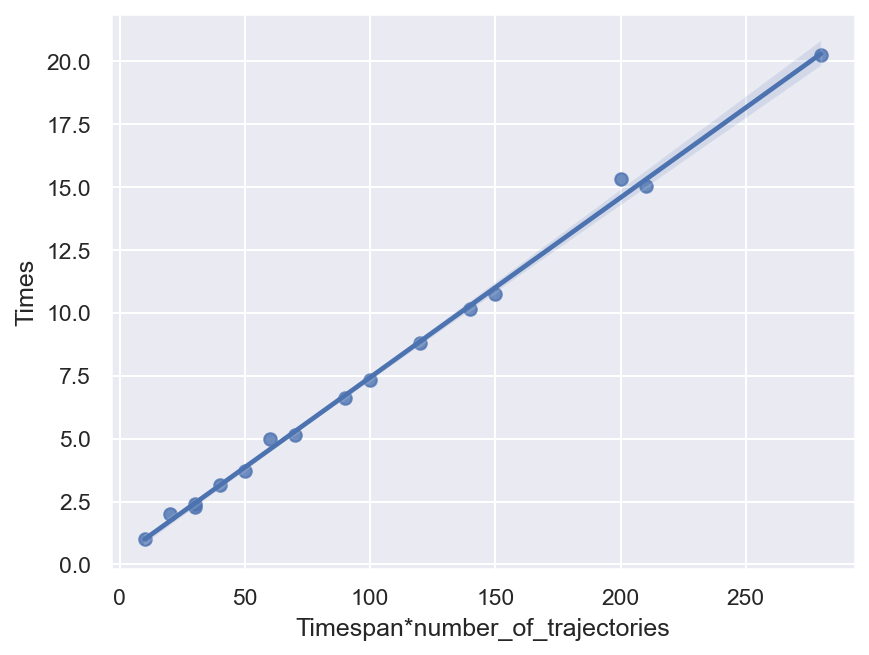

In [13]:
# The distribution of the multiplier relationship of average running times for different products of Timespan and number of trajectories
sns.regplot(y=lst, x=lst_para)
plt.xlabel("Timespan*number_of_trajectories")
plt.ylabel("Times")

In [14]:
# Group analysis
para_groups_hpara = parasweep.groupby(['number_of_trajectories','Timespan'])
for k,v in para_groups_hpara:
    print(f'The hparam values here are: {k}')
    group = para_groups_hpara.get_group(k)
    group = group.copy()
    # Get the result with the lowest num traj and Timespan, we'll use this as the basis.
    #group.sort_values(['number_of_trajectories','Timespan'], inplace=True)
    group = group.reset_index()
    
    num = group[group["runtime"]>=20].shape[0]

    print(f"the number of timeouts: {num}")

The hparam values here are: (1, 10)
the number of timeouts: 0
The hparam values here are: (1, 20)
the number of timeouts: 57
The hparam values here are: (1, 30)
the number of timeouts: 616
The hparam values here are: (1, 40)
the number of timeouts: 1806
The hparam values here are: (3, 10)
the number of timeouts: 0
The hparam values here are: (3, 20)
the number of timeouts: 171
The hparam values here are: (3, 30)
the number of timeouts: 1738
The hparam values here are: (3, 40)
the number of timeouts: 5120
The hparam values here are: (5, 10)
the number of timeouts: 0
The hparam values here are: (5, 20)
the number of timeouts: 281
The hparam values here are: (5, 30)
the number of timeouts: 2844
The hparam values here are: (5, 40)
the number of timeouts: 7885
The hparam values here are: (7, 10)
the number of timeouts: 0
The hparam values here are: (7, 20)
the number of timeouts: 413
The hparam values here are: (7, 30)
the number of timeouts: 3914
The hparam values here are: (7, 40)
the num